<a href="https://colab.research.google.com/github/GJ-007-sage/Quantum-Computing/blob/main/Assignment-Q1nd%202(withoutapi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy==1.21.6  # Required compatible version
!pip install qiskit==0.43.0 qiskit-aer==0.12.0

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [2]:
import qiskit
print("Qiskit version:", qiskit.__version__)
print("Installed components:", qiskit.__qiskit_version__)

try:
    from qiskit import Aer
    print("Aer imported successfully from qiskit!")

except ImportError:
    try:
        from qiskit_aer import Aer
        print("Aer imported successfully from qiskit_aer!")
        print("Aer version:", Aer.__version__)
    except Exception as e:
        print("Failed to import Aer:", e)

Qiskit version: 0.24.0
Installed components: {'qiskit-terra': '0.24.0', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}
Aer imported successfully from qiskit!


In [3]:
try:
    # Try new Qiskit 1.0+ import style first
    from qiskit_aer import Aer
    print("Successfully imported Aer from qiskit_aer")

    # Get version for Aer in Qiskit 1.0+
    import qiskit_aer
    print(f"Aer version: {qiskit_aer.__version__}")

except ImportError:
    try:
        # Fall back to Qiskit 0.x import style
        from qiskit import Aer
        print("Successfully imported Aer from qiskit")

        # Get version for older Qiskit
        import qiskit
        print(f"Full Qiskit version info: {qiskit.__qiskit_version__}")

    except ImportError as e:
        print(f"Failed to import Aer: {e}")

Successfully imported Aer from qiskit_aer
Aer version: 0.12.0


In [4]:
from qiskit import QuantumCircuit

# Try both import methods
try:
    from qiskit_aer import Aer
except ImportError:
    from qiskit import Aer

# Create and run circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)  # Create Bell pair
qc.z(0)      # Apply Z gate
qc.x(0)      # Apply X gate (encoding '11')
qc.cx(0, 1)  # Decode
qc.h(0)
qc.measure([0, 1], [0, 1])

# Run simulation
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1024).result()
print("Measurement results:", result.get_counts())

Measurement results: {'11': 1024}


In [5]:
!pip list | grep qiskit

qiskit                                0.43.0
qiskit-aer                            0.12.0
qiskit-ibmq-provider                  0.20.2
qiskit-qasm3-import                   0.6.0
qiskit-terra                          0.24.0


In [6]:
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def superdense_coding(message):
    """Creates circuit for superdense coding of '00', '01', '10', or '11'"""
    qc = QuantumCircuit(2, 2)

    # 1. Create Bell pair (shared entanglement)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # 2. Alice encodes her message
    if message == '01':
        qc.z(0)
    elif message == '10':
        qc.x(0)
    elif message == '11':
        qc.z(0)
        qc.x(0)
    # '00' requires no operation
    qc.barrier()

    # 3. Bob decodes the message
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()

    # Measure
    qc.measure([0, 1], [0, 1])
    return qc

=== Statevector Validation ===

Message: 00
Final statevector: Statevector([ 1.00000000e+00+0.j, -2.23711432e-17+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j],
            dims=(2, 2))


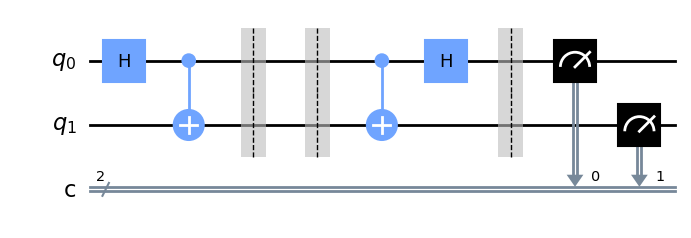


Message: 01
Final statevector: Statevector([-2.23711432e-17+0.j,  1.00000000e+00+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j],
            dims=(2, 2))


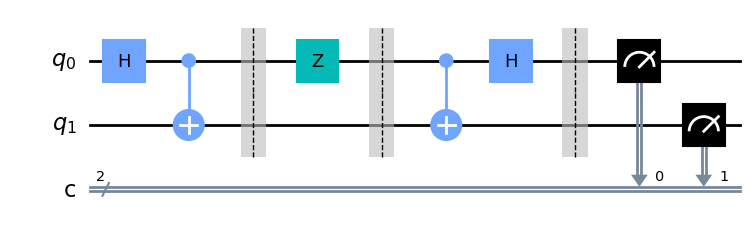


Message: 10
Final statevector: Statevector([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.00000000e+00+0.j,
             -2.23711432e-17+0.j],
            dims=(2, 2))


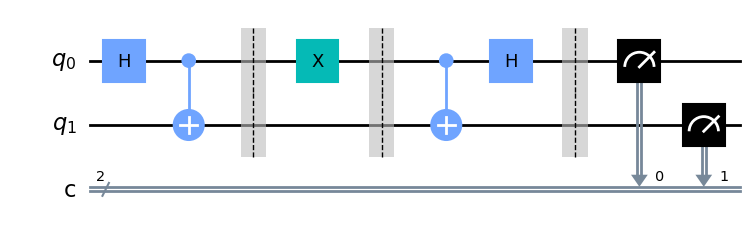


Message: 11
Final statevector: Statevector([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  2.23711432e-17+0.j,
             -1.00000000e+00+0.j],
            dims=(2, 2))


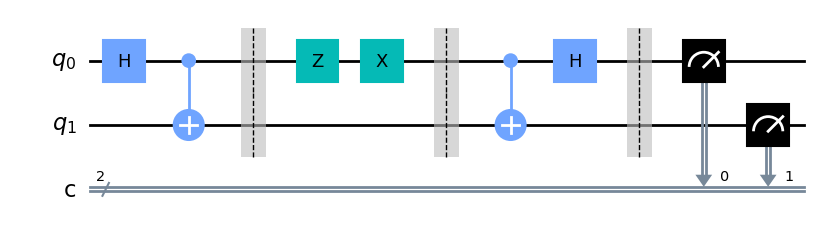

In [8]:
print("=== Statevector Validation ===")
for msg in ['00', '01', '10', '11']:
    qc = superdense_coding(msg)

    # Create a copy of the circuit and remove measurements for statevector calculation
    qc_no_measure = qc.copy()
    qc_no_measure.remove_final_measurements()

    state = Statevector.from_instruction(qc_no_measure)
    print(f"\nMessage: {msg}")
    print("Final statevector:", state)
    display(qc.draw('mpl'))  # Show original circuit with measurements for visual reference


=== Aer Simulator (1024 shots) ===
Results: {'11': 1024}


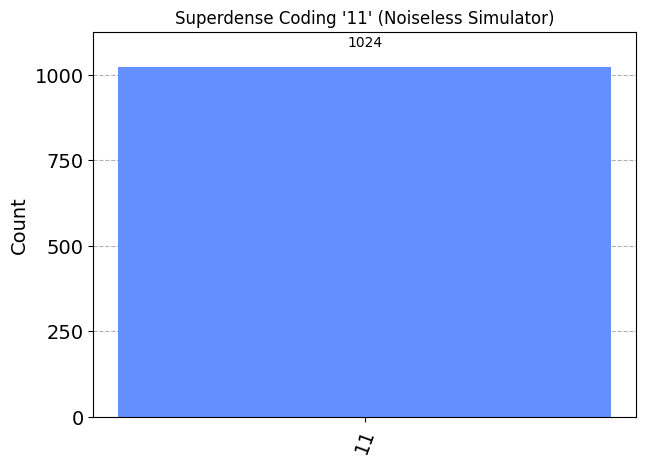

In [10]:
print("\n=== Aer Simulator (1024 shots) ===")
qc_11 = superdense_coding('11')
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc_11, shots=1024).result()
counts = result.get_counts()
print("Results:", counts)
plot_histogram(counts, title="Superdense Coding '11' (Noiseless Simulator)")



=== Noisy Simulation (Hardware-like) ===
Noisy results: {'01': 36, '11': 897, '00': 6, '10': 85}


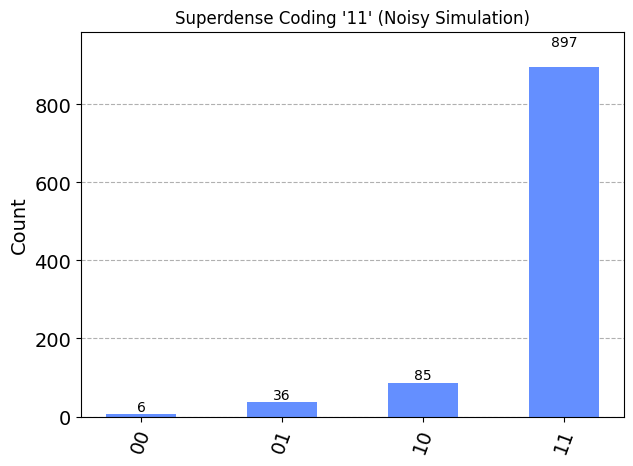

In [11]:
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

print("\n=== Noisy Simulation (Hardware-like) ===")
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)
noisy_simulator = Aer.get_backend('aer_simulator')
result_noisy = noisy_simulator.run(
    qc_11,
    noise_model=noise_model,
    shots=1024
).result()
counts_noisy = result_noisy.get_counts()
print("Noisy results:", counts_noisy)
plot_histogram(counts_noisy, title="Superdense Coding '11' (Noisy Simulation)")



=== Success Rates ===
Noiseless Simulator: 100.00% correct
Noisy Simulator: 87.60% correct


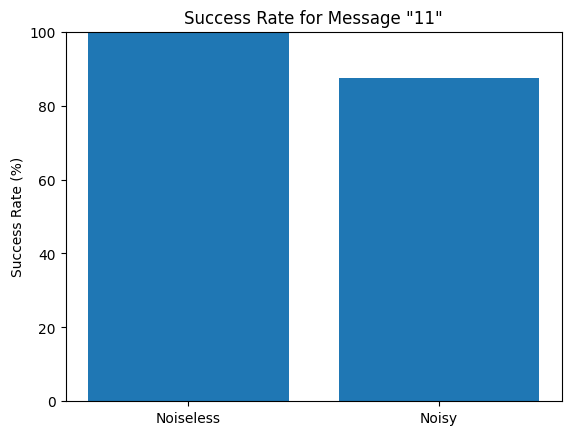

In [12]:
correct_noiseless = counts.get('11', 0)
correct_noisy = counts_noisy.get('11', 0)
success_rate_noiseless = (correct_noiseless / 1024) * 100
success_rate_noisy = (correct_noisy / 1024) * 100

print("\n=== Success Rates ===")
print(f"Noiseless Simulator: {success_rate_noiseless:.2f}% correct")
print(f"Noisy Simulator: {success_rate_noisy:.2f}% correct")

# Plot comparison
plt.bar(['Noiseless', 'Noisy'], [success_rate_noiseless, success_rate_noisy])
plt.ylabel('Success Rate (%)')
plt.title('Success Rate for Message "11"')
plt.ylim(0, 100)
plt.show()

In [13]:
from qiskit import (
    QuantumCircuit,
    execute,
    IBMQ,
    Aer,
    transpile
)
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [17]:
from qiskit import (
    QuantumCircuit,
    execute,
    IBMQ,
    Aer,
    transpile
)
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Replace the following with your actual API token and URL ---
# You can find your API token on the IBM Quantum Experience website (https://quantum-computing.ibm.com/account)
# The URL is typically 'https://quantum-computing.ibm.com/'
API_TOKEN = "e84f25df088f843423e3ee55c002918a402b92534221eb2742f252587551ee750ad1de69321d5e4e4729775a8c83eb83fed518e9c8aaa066381ddb07bfaf2dc8"
API_URL = "https://auth.quantum.ibm.com/api "
# -----------------------------------------------------------------

# Method 1: Enable account directly for this session
try:
    IBMQ.enable_account(API_TOKEN)
    print("IBM Quantum account enabled successfully for this session.")
except Exception as e:
    print(f"Failed to enable IBM Quantum account: {e}")

# Method 2 (Alternative/Recommended): Save account for future sessions
# If you want to save your credentials permanently on this system,
# uncomment the following lines. Run this ONLY ONCE to save.
# try:
#     IBMQ.save_account(API_TOKEN, API_URL, overwrite=True) # Use overwrite=True if you might have old saved credentials
#     print("IBM Quantum account credentials saved successfully.")
# except Exception as e:
#      print(f"Failed to save IBM Quantum account credentials: {e}")

# After saving, you can load the account in subsequent sessions
# try:
#     IBMQ.load_account()
#     print("IBM Quantum account loaded successfully from saved credentials.")
# except IBMQAccountCredentialsNotFound:
#     print("No saved IBM Quantum Experience credentials found. Please enable or save.")
# except Exception as e:
#     print(f"An error occurred while loading account: {e}")


# Get provider and backend
try:
    # Make sure you have successfully enabled or loaded the account before getting the provider
    provider = IBMQ.get_provider(hub='ibm-q')  # Default hub
    # Use backend = provider.get_backend('ibmq_quito') to specify a backend
    # Or use backend = provider.get_backend('ibmq_qasm_simulator') for the cloud simulator
    # Or use least_busy() to get a real device
    # backend = provider.get_backend('ibmq_quito')
    backend = provider.get_backend('ibmq_qasm_simulator') # Using the cloud simulator for demonstration
    print(f"Using backend: {backend.name()}")

except Exception as e:
    print(f"Failed to get IBM Quantum provider or backend: {e}")
    print("Please ensure your account was enabled/loaded correctly and the backend name is valid.")

IBM Quantum account enabled successfully for this session.
Failed to get IBM Quantum provider or backend: 'No backend matches the criteria'
Please ensure your account was enabled/loaded correctly and the backend name is valid.
